In [15]:
import os
from secret_key import openapi_key

In [16]:
os.environ['OPENAI_API_KEY'] = openapi_key

In [17]:
from langchain_community.llms import OpenAI

llm = OpenAI(temperature=0.6)
name = llm.invoke("I want to open a restaurant for Italian food. Suggest a fancy name for this.")
print(name)



"La Bella Cucina" (The Beautiful Kitchen)


In [25]:
# prompt template
# dynamic 
from langchain_core.prompts import PromptTemplate

name_prompt = PromptTemplate(
    input_variables = ['cuisine'],
    template = 'I want to open a restaurant for {cuisine} food. Suggest a fancy name for this.'
)

name_prompt.format(cuisine='Indian')

'I want to open a restaurant for Indian food. Suggest a fancy name for this.'

In [26]:
from langchain_core.output_parsers import StrOutputParser

to_str = StrOutputParser()

# chain - runnable pipeline
name_chain = prompt_template_name | llm | to_str

# run
# print(chain.invoke({"cuisine": "Indian"}))

In [27]:
menu_items_prompt = PromptTemplate(
    input_variables = ['restaurant_name'],
    template = """Suggest some menu items for {restaurant_name}. Return it as a comma separated list"""
)

menu_items_chain = menu_items_prompt | llm | to_str

In [28]:
# # here instead of PromptTemplate, ChatPromptTemplate & instead of OpenAI, ChatOpenAI for future proofing and risk of deprecation
# print(chain.invoke({"cuisine": "Mexican"}))

#### SimpleSequentialChain

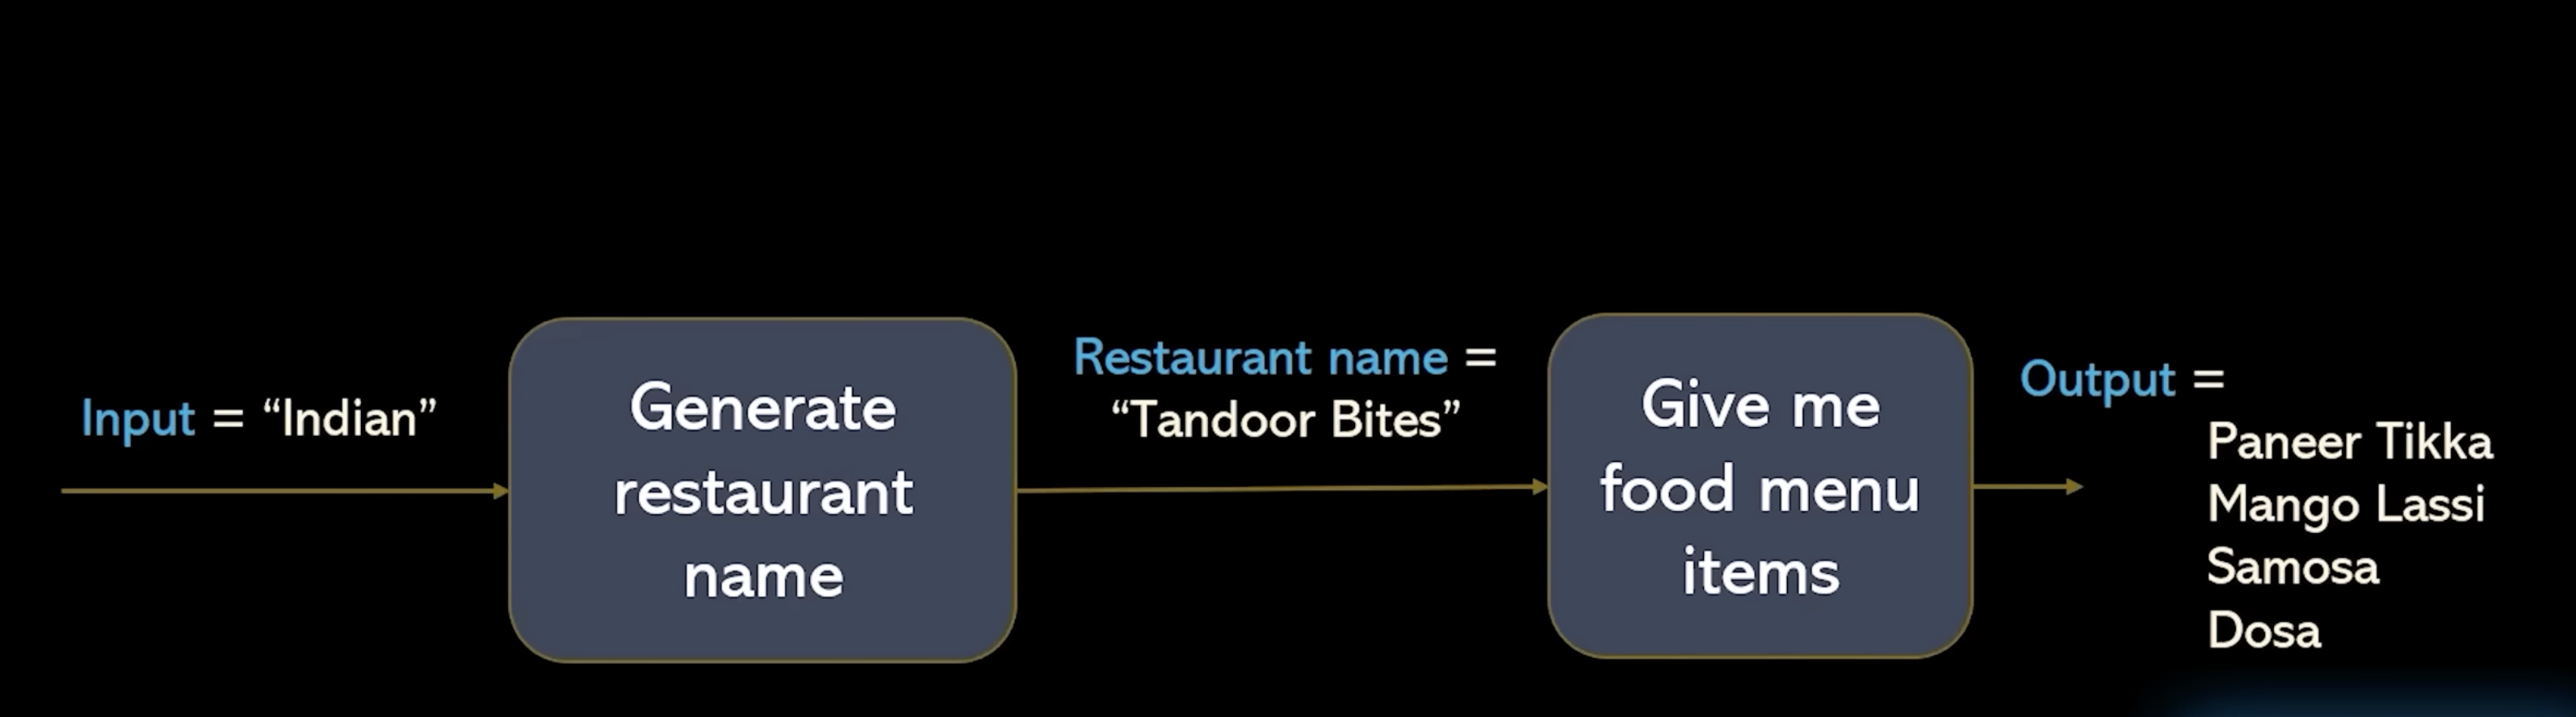

In [36]:
# Wire them: feed output of step 1 into step 2's {restaurant_name}
# (also keep original inputs if you want; RunnablePassthrough lets you pass them along)


overall = name_chain | menu_items_chain
print(overall.invoke("Indian"))



1. Tandoori Chicken
2. Butter Chicken
3. Lamb Rogan Josh
4. Vegetable Samosas
5. Palak Paneer
6. Chicken Tikka Masala
7. Naan Bread
8. Biryani
9. Chana Masala
10. Dal Makhani
11. Aloo Gobi
12. Malai Kofta
13. Mango Lassi
14. Gulab Jamun
15. Kulfi.


In [34]:
# the 2 step pipeline or the simple sequential chain method gives only one final output, but both
# restaurant name and menu items are desired.

# for this purpose we have to use SequentialChain which can have multiple inputs, multiple outputs
# as it retains better context; this was the old framework anyways, new way is through RunnablePassthrough
# pipeline

## Sequential Chain (now RunnablePassthrough)

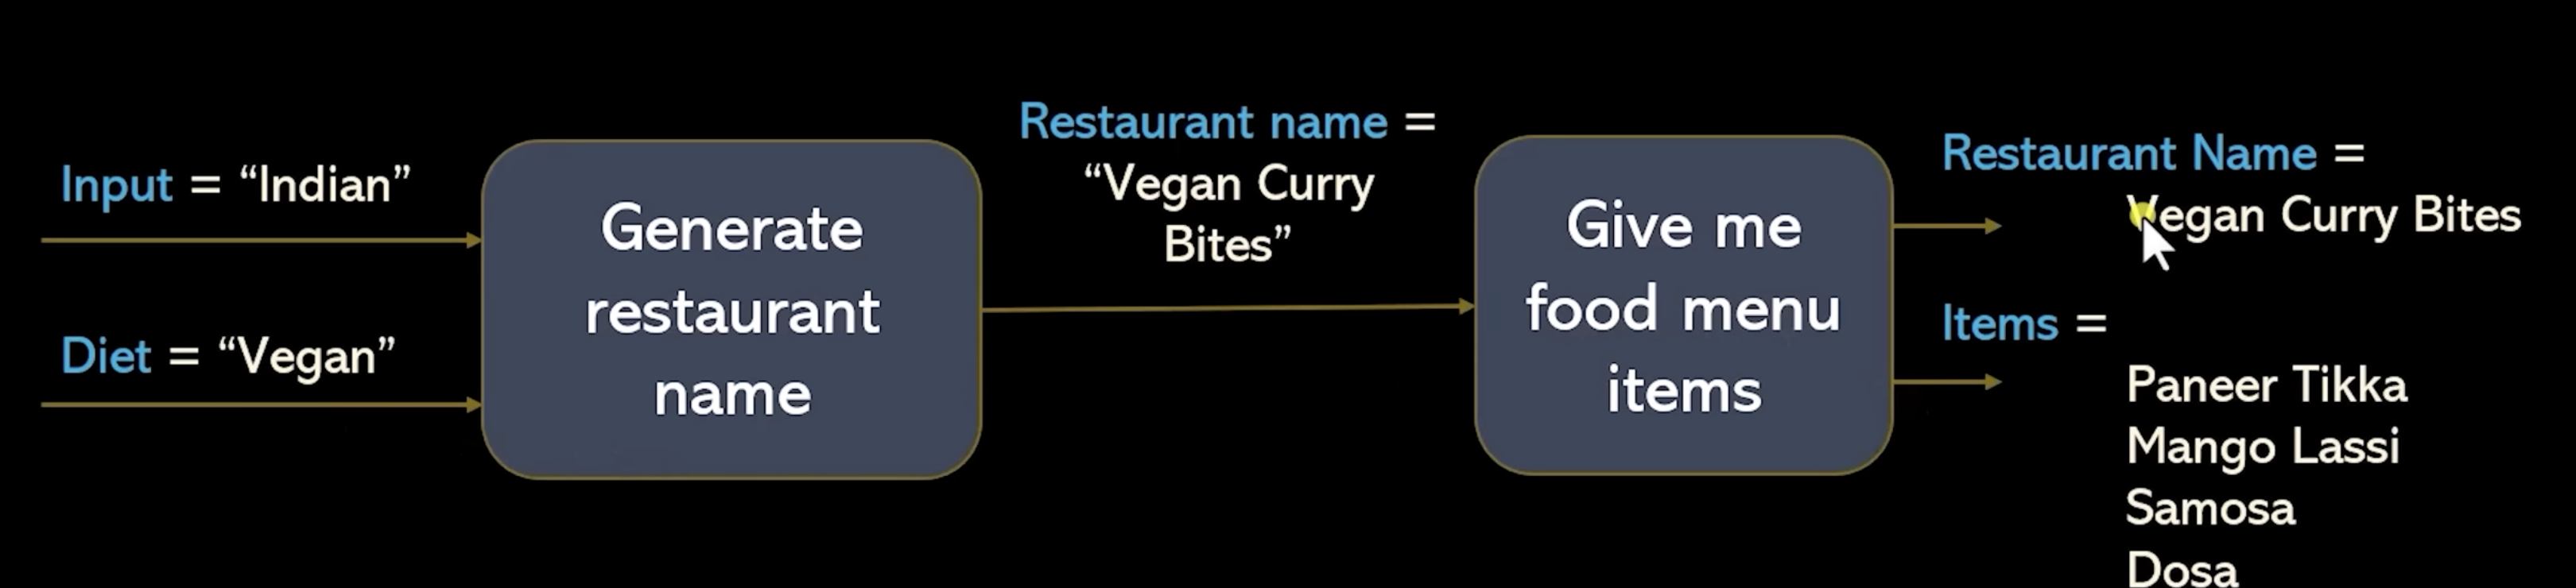

In [39]:
# so at this point we have both, the name chain and the menu-items chain; to mimic the SequentialChain library we do
# the following
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from operator import itemgetter

pipeline = (
    RunnablePassthrough
    .assign(restaurant_name = name_chain)
    .assign(menu = menu_items_chain)
)


In [41]:
final = pipeline | {
    "cuisine" : itemgetter("cuisine"),
    "restaurant_name" : itemgetter("restaurant_name"),
    "menu" : itemgetter("menu")
}

result = final.invoke({"cuisine": "Japanese"})
print(result)

{'cuisine': 'Japanese', 'restaurant_name': '\n\n"Sakura Savor"', 'menu': '\n\n1. Sakura Blossom Salad, \n2. Grilled Teriyaki Salmon, \n3. Chicken Katsu with Sakura Sauce, \n4. Sakura Sushi Roll, \n5. Beef Sukiyaki, \n6. Tempura Vegetable Udon, \n7. Sakura Miso Soup, \n8. Sakura Spring Rolls, \n9. Sakura Glazed Pork Belly, \n10. Matcha Green Tea Cheesecake.'}
